In [7]:
import os
from pathlib import Path

base_dir = Path(os.getcwd()).parent

In [8]:
from transformers import AutoTokenizer
from src.utils.config_loader import load_config
from src.data.preprocessing import create_df
from src.data.dataset import Dataset

config = load_config(base_dir / 'model_params.yaml')

tokenizer = AutoTokenizer.from_pretrained(config['model']['model_name'])

data_df = create_df(base_dir / 'data/norne/ud/nob/no_bokmaal-ud-train.conllu')

data_df

,words,labels
0,"[Lam, og, piggvar, på, bryllupsmenyen]","[O, O, O, O, O]"
1,"[Kamskjell, ,, piggvar, og, lammefilet, sto, p...","[O, O, O, O, O, O, O, O, O, O, O, O, O]"
2,"[Og, til, dessert, :, Parfait, à, la, Mette-Ma...","[O, O, O, O, B-PROD, I-PROD, I-PROD, I-PROD, O]"
3,"[Forretten, lyder, navnet, "", Coquilles, St., ...","[O, O, O, O, B-PROD, I-PROD, I-PROD, I-PROD, I..."
4,"[Deretter, fulgte, "", Turbot, au, Four, -, pur...","[O, O, O, B-PROD, I-PROD, I-PROD, I-PROD, I-PR..."
...,...,...
15691,"[Et, helårs, reisemål, for, den, som, liker, n...","[O, O, O, O, O, O, O, O, O, O, O, O]"
15692,"[Du, må, være, innstilt, på, at, du, kan, få, ...","[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ..."
15693,"[Bo, :]","[O, O]"
15694,"[Mange, muligheter, for, overnatting, i, Torsh...","[O, O, O, O, O, B-GPE_LOC, O, O, O, O, O, O, O..."


In [9]:
import pandas as pd
import numpy as np

tokenized_lengths = []

for sentence in data_df['words']:  
    length = len(
        tokenizer.encode(
        sentence, 
        is_split_into_words=True, 
        add_special_tokens=True
        )
    )
    tokenized_lengths.append(length)

p_95 = int(np.percentile(tokenized_lengths, 95)) # 95th percentile

p_95

40

In [10]:
df = pd.DataFrame(tokenized_lengths)

df.describe()

,0
count,15696.000000
mean,19.804027
std,11.105252
min,3.000000
25%,11.000000
50%,18.000000
75%,26.000000
max,107.000000


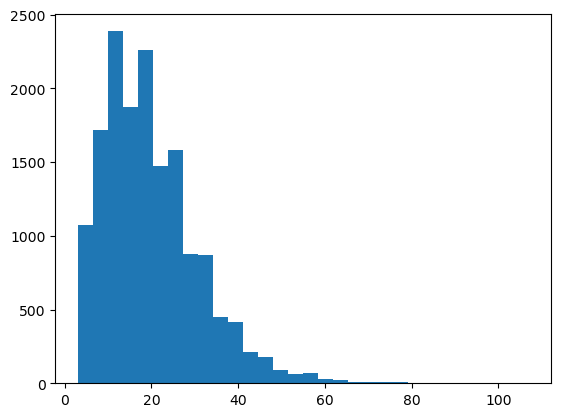

In [11]:
import matplotlib.pyplot as plt

plt.hist(df, bins=30)
plt.show()

In [12]:
# The distribution of entities

entity_counts = pd.Series([label for sublist in data_df['labels'] for label in sublist]).value_counts()

entity_counts

O            228049
B-PER          4070
B-ORG          2849
I-PER          2308
B-GPE_LOC      2136
I-ORG           944
B-PROD          676
B-LOC           618
I-PROD          608
B-DRV           524
B-GPE_ORG       389
I-LOC           224
I-GPE_LOC       142
B-EVT           133
I-DRV           116
I-EVT            68
I-GPE_ORG        21
B-MISC            8
I-MISC            4
Name: count, dtype: int64